# Classificazione Binaria: `selfMade` con rulebased RIPPER

L'obiettivo è addestrare un classificatore basato su RIPPER (Repeated Incremental Pruning to Produce Error Reduction) per prevedere se un individuo è self-made o no.

- Viene utilizzata wittgenstein che è una libreria python che implementa ripper.
- Viene creato un modello ripper, impostando k=2(numero massimo di regole alternative in fase di pruning)
- Infine per visualizzare le regole, vengono estratte da model.ruleset_ e salvate su file.txt

In [47]:
import pandas as pd
import wittgenstein as lw
import sys
import numpy as np
sys.path.append('../Scripts')
from utility import evaluate_and_save_model,plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

k=2
model = lw.RIPPER(k=k)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

evaluate_and_save_model(
    model,
    "ripper",
    y_train,
    y_pred_train,
    y_test,
    y_pred_test,
    "../results/classification_selfMade/rule_based/direct",
    "../models/rule_based_ripper.joblib"
)
rules_path = "../results/classification_selfMade/rule_based/direct/rules.txt"
with open(rules_path, "w") as f:
    f.write("=== RIPPER Rule Set ===\n\n")
    for i, rule in enumerate(model.ruleset_, 1):
        predicted_class = int(np.argmax(rule.class_freqs_))
        f.write(f"Rule {i}: [{rule.conds}] => class={predicted_class}\n")




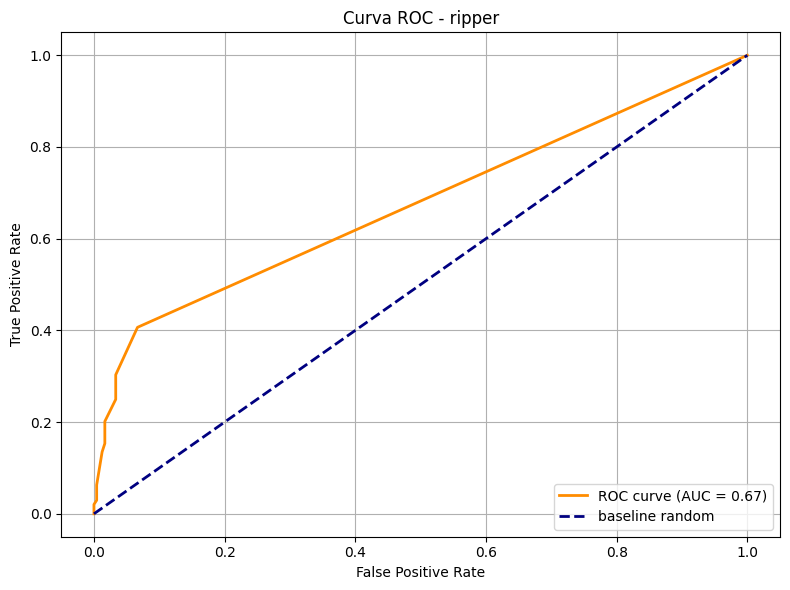

np.float64(0.6735559149722736)

In [43]:
plot_roc_curve(model, X_test, y_test, "ripper",f"../results/classification_selfMade/roc")


# Calcolo accuracy di ciascuna regola prodotta da ripper
In questa sezione vengono analizzate le regole apprese dal classificatore RIPPER.

Per ciascuna regola, viene calcolato:

- Copertura (covered): num di istanze coperte dalla regola r (n)
- Correttezza (correct): num di istanze correttamente classificate da r (n_r)
- Accuracy della regola: calcolata come \[n_r/n\]

Il metodo ripper per problemi a 2 classi, sceglie una delle classi come classe positiva e l’altra come classe negativa quindi costruisce le regole per la classe positiva e la classe negativa sarà la classe di default.

In [48]:
# dataframe
df_test = X_test.copy()
df_test["selfMade"] = y_test

# regole estratte presenti in ../results/classification_selfMade/rule_based/direct
rules = {
    "Rule 1": "(country_China == True) and (age >= 58.0) and (age <= 61.0)",
    "Rule 2": "(`log_gdp_country` > 30.62) and (`cpi_country` >= 119.8) and (`cpi_country` <= 125.08) and (`category_Metals & Mining` == False)",
    "Rule 3": "(`category_Technology` == True) and (`cpi_country` >= 115.16) and (`cpi_country` <= 117.24)",
    "Rule 4": "(`cpi_country` > 180.44) and (`log_gdp_country` >= 27.96) and (`log_gdp_country` <= 28.34)",
    "Rule 5": "(`category_Technology` == True) and (`country_South Korea` == False)",
}

# iteriamo sulle condizioni, di conseguenza filtriamo utilizzando query() i record coperti dalla regola 1 fino
# alla regola 5 in questo caso ottenendo un df filtrato con i record coperti dalla regola i-esima.

for nome, condizione in rules.items():
    coperti = df_test.query(condizione)

    if len(coperti) == 0:
        print(f"{nome}: Nessun esempio coperto.")
        

    corretti = coperti[coperti["selfMade"] == 1]
    accuracy = len(corretti) / len(coperti)
    print(f"{nome}: coperti = {len(coperti)}, corretti = {len(corretti)}, accuracy = {accuracy}")


Rule 1: coperti = 38, corretti = 37, accuracy = 0.9736842105263158
Rule 2: coperti = 160, corretti = 156, accuracy = 0.975
Rule 3: coperti = 44, corretti = 39, accuracy = 0.8863636363636364
Rule 4: coperti = 22, corretti = 22, accuracy = 1.0
Rule 5: coperti = 90, corretti = 84, accuracy = 0.9333333333333333
